In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

# Загружаем данные из формата parquet
X_train = pd.read_parquet('data/X_train.parquet')
X_test = pd.read_parquet('data/X_test.parquet')
y_train = pd.read_parquet('data/y_train.parquet')
y_test = pd.read_parquet('data/y_test.parquet')


In [17]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Compute classification metrics for Logistic Regression
classification_metrics_logreg = classification_report(y_test, y_pred_logreg)
print("Metrics for Logistic Regression:")
print(classification_metrics_logreg)


Metrics for Logistic Regression:
              precision    recall  f1-score   support

       False       0.66      0.79      0.72        48
        True       0.74      0.58      0.65        48

    accuracy                           0.69        96
   macro avg       0.70      0.69      0.68        96
weighted avg       0.70      0.69      0.68        96


C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Обучите модель RandomForestClassifier
dt_regressor = RandomForestClassifier()
dt_regressor.fit(X_train, y_train)
# Сделайте предсказания на тестовом наборе
y_pred_dt = dt_regressor.predict(X_test)
# Вычислите метрики для RandomForestClassifier
classification_metrics = classification_report(y_test, y_pred_dt)

print("Metrics for RandomForestClassifier:")
print(classification_metrics)
print("\n")

C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Metrics for RandomForestClassifier:
              precision    recall  f1-score   support

       False       0.60      0.58      0.59        48
        True       0.59      0.60      0.60        48

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.59      0.59      0.59        96


Metrics for XGBoost:
              precision    recall  f1-score   support

       False       0.63      0.54      0.58        48
        True       0.60      0.69      0.64        48

    accuracy                           0.61        96
   macro avg       0.62      0.61      0.61        96
weighted avg       0.62      0.61      0.61        96


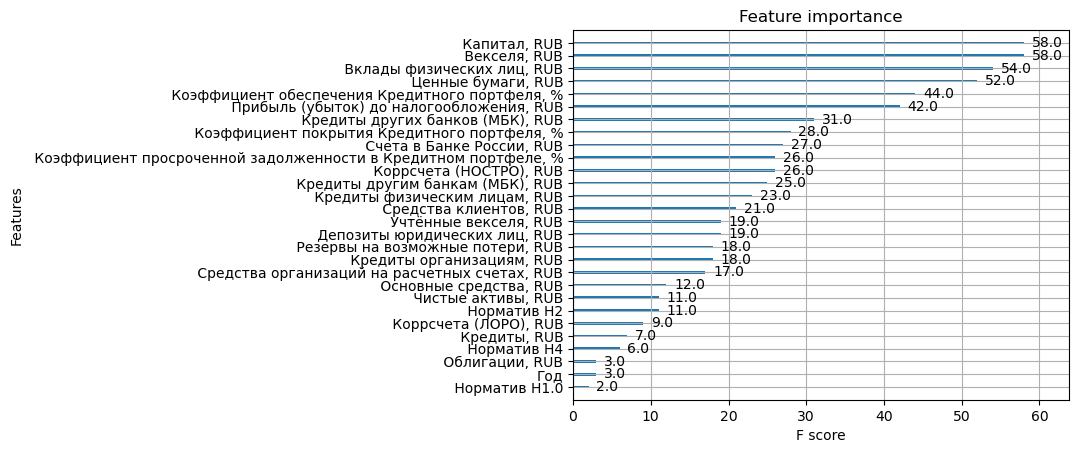

In [19]:


xgb_params = {
    "max_depth": 5,
    "n_estimators": 1100,
    "learning_rate": 0.0965746078281294,
    "subsample": 1,
    "gamma": 0.4124196272598232,
    "min_child_weight": 0.33468400050527614,
    "max_delta_step": 0.7973068260558458,
    "colsample_bytree": 0.6701472435944006,
    "reg_alpha": 0.9978907806518094,
    "reg_lambda": 0.61747493495669,
    "scale_pos_weight": 0.9587691256695492
}

# Обучите модель XGBClassifier
xgb_regressor = xgb.XGBClassifier(**xgb_params, tree_method="gpu_hist")
xgb_regressor.fit(X_train, y_train)

# Сделайте предсказания на тестовом наборе
y_pred_xgb = xgb_regressor.predict(X_test)

# Вычислите метрики для XGBClassifier
classification_metrics = classification_report(y_test, y_pred_xgb)

print("Metrics for XGBoost:")
print(classification_metrics)

# Plot feature importance
xgb.plot_importance(xgb_regressor)
plt.show()


In [20]:
# Преобразование в одномерный массив
y_test_1d = y_test.values.ravel()

# Создание датафрейма с предсказанными и фактическими значениями и значениями из X_test
df_predictions = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_xgb})
df_predictions = pd.concat([df_predictions, pd.DataFrame(X_test)], axis=1)
df_predictions

,Actual,Predicted,Год,"Векселя, RUB","Вклады физических лиц, RUB","Депозиты юридических лиц, RUB","Капитал, RUB","Коррсчета (ЛОРО), RUB","Коррсчета (НОСТРО), RUB","Коэффициент невозврата основной суммы долга, %",...,"Облигации, RUB","Основные средства, RUB","Прибыль (убыток) до налогообложения, RUB","Резервы на возможные потери, RUB","Средства клиентов, RUB","Средства организаций на расчетных счетах, RUB","Счета в Банке России, RUB","Учтённые векселя, RUB","Ценные бумаги, RUB","Чистые активы, RUB"
0,True,1,2014,0.0,2.508170e+09,158700000.0,8.074760e+08,0.0,101863000.0,0.0,...,0.0,603880000.0,-18807000.0,1.854950e+08,2.986954e+09,3.122460e+08,3.986500e+07,0.0,1.286638e+09,4.919584e+09
1,True,1,2012,60886000.0,4.621720e+09,213360000.0,6.326230e+08,38000.0,26338000.0,0.0,...,0.0,435553000.0,99222000.0,2.271150e+08,5.128386e+09,2.928540e+08,2.070790e+08,81154000.0,8.473500e+07,6.127569e+09
2,True,1,2016,89375000.0,7.720531e+09,236825000.0,1.236627e+09,50000.0,95844000.0,0.0,...,0.0,312295000.0,10609000.0,6.193540e+08,8.917224e+09,9.459990e+08,1.920459e+09,0.0,2.098677e+09,1.232453e+10
3,True,0,2014,0.0,1.323589e+09,100000000.0,3.541160e+08,0.0,59268000.0,0.0,...,0.0,240435000.0,34743000.0,2.622300e+07,2.013840e+09,5.770530e+08,6.090900e+07,48007000.0,4.800700e+07,2.384694e+09
4,False,0,2016,0.0,6.272000e+06,606569000.0,1.147348e+09,687445000.0,384134000.0,0.0,...,0.0,2688000.0,398462000.0,7.091330e+08,9.992520e+08,3.847500e+08,1.227672e+09,0.0,1.386400e+07,7.702261e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,True,1,2013,1360000.0,3.499550e+08,122258000.0,1.909210e+08,0.0,4820000.0,0.0,...,0.0,103981000.0,-24308000.0,7.350100e+07,5.286390e+08,5.624900e+07,7.534400e+07,0.0,0.000000e+00,7.746640e+08
92,False,0,2015,0.0,3.864469e+09,17507000.0,1.567862e+09,27778000.0,340679000.0,0.0,...,0.0,20730000.0,40212000.0,1.011742e+09,5.954088e+09,2.028059e+09,1.357451e+09,0.0,1.937753e+09,8.718775e+09
93,True,1,2013,36766000.0,0.000000e+00,62868000.0,2.393790e+08,245470000.0,117072000.0,0.0,...,0.0,484000.0,28234000.0,5.163000e+07,1.055900e+08,4.272200e+07,1.465900e+07,0.0,0.000000e+00,7.328460e+08
94,True,0,2013,0.0,1.613000e+06,35000000.0,2.562900e+08,0.0,7223000.0,0.0,...,0.0,432000.0,6870000.0,2.669000e+07,6.428300e+07,2.767000e+07,1.135500e+07,0.0,0.000000e+00,3.247530e+08


In [21]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
y_train_gbm = y_train.astype(int)
y_test_gbm = y_test.astype(int)
X_train_gbm = X_train
X_test_gbm = X_test
# Переименовать столбцы, заменяя запрещенные символы на разрешенные
X_train_gbm.columns = ["".join(c if c.isalnum() or c in {'_', '.'} else '_' for c in str(x)) for x in X_train.columns]
X_test_gbm.columns = ["".join(c if c.isalnum() or c in {'_', '.'} else '_' for c in str(x)) for x in X_test.columns]

# Create an instance of the LGBMClassifier
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',  # Metric for binary classification
}

lgbm_classifier = LGBMClassifier(**lgbm_params)

# Train the classifier on the training data
lgbm_classifier.fit(X_train_gbm, y_train_gbm, eval_metric='auc', eval_set=[(X_test_gbm, y_test_gbm)])

# Make predictions on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test_gbm)

# Compute classification metrics for LightGBM
classification_metrics_lgbm = classification_report(y_test_gbm, y_pred_lgbm)
print("Metrics for LightGBM:")
print(classification_metrics_lgbm)



[LightGBM] [Info] Number of positive: 111, number of negative: 111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [22]:
y_train_gbm

,Категориальная переменная
0,1
1,0
2,1
3,1
4,1
...,...
217,0
218,0
219,0
220,1


In [23]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

# Создайте объект классификатора CatBoost
catboost_params = {
    'loss_function': 'Logloss',  # Функция потерь для бинарной классификации
    'eval_metric': 'BalancedAccuracy',  # Метрика оценки качества
    'random_seed': 42,  # Зафиксируйте случайность для воспроизводимости
}

catboost_classifier = CatBoostClassifier(task_type='GPU',**catboost_params)

# Обучите классификатор на тренировочных данных
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Сделайте предсказания на тестовом наборе
y_pred_catboost = catboost_classifier.predict(X_test)

# Convert the labels in y_pred_catboost to bool type
y_pred_catboost = y_pred_catboost.astype(bool)

# Вычислите метрики для CatBoostClassifier
classification_metrics_catboost = classification_report(y_test, y_pred_catboost)

print("Metrics for CatBoost:")
print(classification_metrics_catboost)
# Выведите важность признаков
feature_importance = catboost_classifier.get_feature_importance(prettified=True)
print("Feature Importance for CatBoost:")
print(feature_importance)


Learning rate set to 0.080925


Default metric period is 5 because BalancedAccuracy is/are not implemented for GPU
Metric BalancedAccuracy is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.7477477	test: 0.4687500	best: 0.4687500 (0)	total: 235ms	remaining: 3m 55s
1:	total: 803ms	remaining: 6m 40s
2:	total: 1.11s	remaining: 6m 9s
3:	total: 1.21s	remaining: 5m
4:	total: 1.29s	remaining: 4m 16s
5:	learn: 0.8423423	test: 0.6041667	best: 0.6145833 (4)	total: 1.36s	remaining: 3m 45s
6:	total: 1.46s	remaining: 3m 26s
7:	total: 1.55s	remaining: 3m 12s
8:	total: 1.63s	remaining: 2m 59s
9:	total: 1.71s	remaining: 2m 49s
10:	learn: 0.9054054	test: 0.5625000	best: 0.6145833 (4)	total: 1.84s	remaining: 2m 45s
11:	total: 2s	remaining: 2m 45s
12:	total: 2.09s	remaining: 2m 38s
13:	total: 2.29s	remaining: 2m 41s
14:	total: 2.38s	remaining: 2m 36s
15:	learn: 0.9459459	test: 0.5937500	best: 0.6250000 (14)	total: 2.5s	remaining: 2m 33s
16:	total: 2.57s	remaining: 2m 28s
17:	total: 2.65s	remaining: 2m 24s
18:	total: 2.72s	remaining: 2m 20s
19:	total: 2.79s	remaining: 2m 16s
20:	learn: 0.9504505	test: 0.6041667	best: 0.6250000 (14)	total: 2.87s	remaining: 2m 13s
21:	total: 2.96s	

C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu